In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import *
from sklearn import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn import *
from sklearn.metrics import *
from mnist import *
from pandas import *
from datetime import date
from collections import namedtuple
import cv2
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import *
from sklearn.metrics import *
from scipy import *
from sklearn.metrics import confusion_matrix
import itertools
import os
from keras.utils.np_utils import * 
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import *
from keras.callbacks import *
from skimage.filters import threshold_local


Using TensorFlow backend.


In [2]:
homePath_train = "/home/giang/Desktop/ThucTap/Tuan3/data/"

In [3]:
chars = ['0', '1']
chars

['0', '1']

In [4]:
# ham xu li du lieu
def preprocessdata(homePath):
    data=[]
    label=[]
    for i,char in enumerate(chars):
        imgPath = homePath + char + "/"
        print(imgPath)
        imgFiles = os.listdir(imgPath)
#         kk = 0
        for image in imgFiles:
   
            img = cv2.imread(imgPath + image,0)
            img = cv2.resize(img, (28, 28))
            
#             print(img.shape)
#             noise_removal = cv2.bilateralFilter(img,9,75,75)

#             equal_histogram = cv2.equalizeHist(noise_removal)
#             img_pad = np.zeros([28, 28])
#             img_pad[6:26, 3:23] = img
            data.append(img)
            label.append(i)

    l = len(label)
    shutfle = list(range(l))
    random.shuffle(shutfle)
    train_data = np.array(data)
    train_label = np.array(label)
    train_data = train_data[shutfle]
    train_label = train_label[shutfle]
    return data,label

In [5]:
data,label = preprocessdata(homePath_train)

/home/giang/Desktop/ThucTap/Tuan3/data/0/
/home/giang/Desktop/ThucTap/Tuan3/data/1/


In [6]:
x = data
y = label

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
y_tt = y_test

In [8]:
X_train = reshape(X_train,(-1,28,28,1))
y_train = to_categorical(y_train, num_classes = 2)
X_test = reshape(X_test,(-1,28,28,1))
y_test = to_categorical(y_test, num_classes = 2)

<ipython-input-8-c4f5b2067eb1>:1: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  X_train = reshape(X_train,(-1,28,28,1))
<ipython-input-8-c4f5b2067eb1>:3: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  X_test = reshape(X_test,(-1,28,28,1))


In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
# model.summary()
# res = model.fit(X_train, y_train, validation_split=0.2,shuffle=True,
#                  batch_size=256, epochs=200, verbose=1)

# model.save("b2_t3_.h5")
model = load_model("bt2_t3_200epochs.h5")

Train on 5009 samples, validate on 1253 samples
Epoch 1/200
5009/5009 [==============================] - 11s 2ms/step - loss: 1.8167 - accuracy: 0.5849 - val_loss: 0.5821 - val_accuracy: 0.8085
Epoch 2/200
5009/5009 [==============================] - 15s 3ms/step - loss: 0.5895 - accuracy: 0.7233 - val_loss: 0.4699 - val_accuracy: 0.8284
Epoch 3/200
5009/5009 [==============================] - 15s 3ms/step - loss: 0.5254 - accuracy: 0.7720 - val_loss: 0.4127 - val_accuracy: 0.8452
Epoch 4/200
5009/5009 [==============================] - 12s 2ms/step - loss: 0.5045 - accuracy: 0.7904 - val_loss: 0.3993 - val_accuracy: 0.8420
Epoch 5/200
5009/5009 [==============================] - 13s 3ms/step - loss: 0.4813 - accuracy: 0.8048 - val_loss: 0.4022 - val_accuracy: 0.8563
Epoch 6/200
5009/5009 [==============================] - 9s 2ms/step - loss: 0.4659 - accuracy: 0.8139 - val_loss: 0.3919 - val_accuracy: 0.8428
Epoch 7/200
5009/5009 [==============================] - 10s 2ms/step - loss:

5009/5009 [==============================] - 15s 3ms/step - loss: 0.0860 - accuracy: 0.9730 - val_loss: 0.2765 - val_accuracy: 0.9258
Epoch 57/200
5009/5009 [==============================] - 15s 3ms/step - loss: 0.0796 - accuracy: 0.9695 - val_loss: 0.2836 - val_accuracy: 0.9393
Epoch 58/200
5009/5009 [==============================] - 15s 3ms/step - loss: 0.0714 - accuracy: 0.9744 - val_loss: 0.2717 - val_accuracy: 0.9274
Epoch 59/200
5009/5009 [==============================] - 13s 3ms/step - loss: 0.0963 - accuracy: 0.9647 - val_loss: 0.3072 - val_accuracy: 0.9178
Epoch 60/200
5009/5009 [==============================] - 10s 2ms/step - loss: 0.1080 - accuracy: 0.9621 - val_loss: 0.3036 - val_accuracy: 0.9354
Epoch 61/200
5009/5009 [==============================] - 9s 2ms/step - loss: 0.0694 - accuracy: 0.9740 - val_loss: 0.2984 - val_accuracy: 0.9322
Epoch 62/200
5009/5009 [==============================] - 9s 2ms/step - loss: 0.0602 - accuracy: 0.9786 - val_loss: 0.2971 - val_acc

Epoch 112/200
5009/5009 [==============================] - 11s 2ms/step - loss: 0.0227 - accuracy: 0.9916 - val_loss: 0.4317 - val_accuracy: 0.9362
Epoch 113/200
5009/5009 [==============================] - 11s 2ms/step - loss: 0.0258 - accuracy: 0.9894 - val_loss: 0.3697 - val_accuracy: 0.9401
Epoch 114/200
5009/5009 [==============================] - 9s 2ms/step - loss: 0.0338 - accuracy: 0.9884 - val_loss: 0.3640 - val_accuracy: 0.9433
Epoch 115/200
5009/5009 [==============================] - 11s 2ms/step - loss: 0.0509 - accuracy: 0.9818 - val_loss: 0.3789 - val_accuracy: 0.9234
Epoch 116/200
5009/5009 [==============================] - 10s 2ms/step - loss: 0.0625 - accuracy: 0.9784 - val_loss: 0.3008 - val_accuracy: 0.9314
Epoch 117/200
5009/5009 [==============================] - 11s 2ms/step - loss: 0.0359 - accuracy: 0.9874 - val_loss: 0.3679 - val_accuracy: 0.9266
Epoch 118/200
5009/5009 [==============================] - 13s 3ms/step - loss: 0.0329 - accuracy: 0.9888 - val_l

5009/5009 [==============================] - 10s 2ms/step - loss: 0.0188 - accuracy: 0.9934 - val_loss: 0.3937 - val_accuracy: 0.9401
Epoch 168/200
5009/5009 [==============================] - 9s 2ms/step - loss: 0.0247 - accuracy: 0.9906 - val_loss: 0.3858 - val_accuracy: 0.9306
Epoch 169/200
5009/5009 [==============================] - 11s 2ms/step - loss: 0.0170 - accuracy: 0.9936 - val_loss: 0.3868 - val_accuracy: 0.9354
Epoch 170/200
5009/5009 [==============================] - 10s 2ms/step - loss: 0.0188 - accuracy: 0.9930 - val_loss: 0.4228 - val_accuracy: 0.9346
Epoch 171/200
5009/5009 [==============================] - 10s 2ms/step - loss: 0.0292 - accuracy: 0.9904 - val_loss: 0.4167 - val_accuracy: 0.9425
Epoch 172/200
5009/5009 [==============================] - 10s 2ms/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.3901 - val_accuracy: 0.9354
Epoch 173/200
5009/5009 [==============================] - 10s 2ms/step - loss: 0.0226 - accuracy: 0.9930 - val_loss: 0.4035 - 

In [10]:
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.3457924599530961, 0.935543954372406]

In [11]:
results = chars.copy()

In [46]:
# model = Sequential()
# model = create_model()

img_ = cv2.imread("/home/giang/Pictures/anhtest1000.jpg", 0)
X_test__ = cv2.resize(img_, (28, 28))

In [47]:
y_predict = model.predict(X_test__.reshape(1,28,28,1))
test_logits = np.argmax(y_predict, axis=-1)
res__ = results[int(test_logits)]
res__

'1'

In [14]:
kq = model.predict(X_test)
kq

array([[7.3523603e-07, 9.9999928e-01],
       [3.1087890e-08, 1.0000000e+00],
       [1.6116406e-08, 1.0000000e+00],
       ...,
       [1.0000000e+00, 3.2941272e-10],
       [1.0000000e+00, 2.8791693e-13],
       [9.7178686e-01, 2.8213156e-02]], dtype=float32)

In [15]:
resS = np.argmax(kq, axis=-1)
resS

array([1, 1, 1, ..., 0, 0, 0])

In [16]:
print(classification_report(y_tt, resS, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1346
           1       0.96      0.91      0.93      1338

    accuracy                           0.94      2684
   macro avg       0.94      0.94      0.94      2684
weighted avg       0.94      0.94      0.94      2684



In [56]:
# dau vao la duong dan cua anh (path)
# dau ra la ket qua phan loai ( co ban do hay khong )
def PrintResult(path):
    im = cv2.imread(path, 1)
    im = cv2.resize(im, (800, 800))
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

    noise_removal = cv2.bilateralFilter(im_gray,9,75,75)

    equal_histogram = cv2.equalizeHist(noise_removal)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
    morph_image = cv2.morphologyEx(equal_histogram,cv2.MORPH_OPEN,kernel,iterations=20)

    sub_morp_image = cv2.subtract(equal_histogram,morph_image)
    ret,thresh_image = cv2.threshold(sub_morp_image,200,255,cv2.THRESH_OTSU)

    canny_image = cv2.Canny(thresh_image,250,255)
    kernel = np.ones((3,3), np.uint8)
    dilated_image = cv2.dilate(canny_image,kernel,iterations=1)
    plt.imshow(cv2.cvtColor(dilated_image,cv2.COLOR_BGR2RGB))
    plt.show()
    contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    contours= sorted(contours, key = cv2.contourArea, reverse = True)
    screenCnt = None
    roi_img = []
    check = 0
    for c in contours:
        peri = cv2.arcLength(c, True) 
        print(peri)
        if(peri < 250):
            continue
        
        approx = cv2.approxPolyDP(c, 0.06 * peri, True) 
        if len(approx) == 4:
            screenCnt = approx
            (x,y,w,h) = cv2.boundingRect(screenCnt)
            roi = im[y:y+h,x:x+w]
            roi_ccc = roi
            roi_img.append(roi)
            plt.imshow(cv2.cvtColor(roi_ccc,cv2.COLOR_BGR2RGB))
            plt.show()
    #         plt.imshow(cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))
    #         plt.show()
            roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            X_test__ = cv2.resize(roi, (28, 28))
            y_predict = model.predict(X_test__.reshape(1,28,28,1))
    #         print(" y predict", y_predict)
            test_logits = np.argmax(y_predict, axis=-1)
            res__ = results[int(test_logits)]

            if(res__ == '1'):
                check = 1
#                 plt.imshow(cv2.cvtColor(roi_ccc,cv2.COLOR_BGR2RGB))
#                 plt.show()
                break

    # print(check)
    if(check == 1):
        print("anh co chua ban do")
    else:
        print("anh khong chua ban do")
        

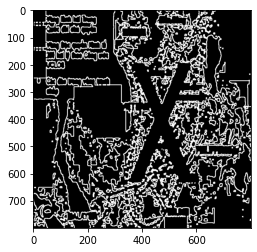

14028.499674677849
1486.312829375267
1420.2295715808868
997.9970346689224
1696.7219903469086
635.7300090789795
1072.8498450517654
749.5289984941483
1993.817444562912
682.7594468593597
739.3279883861542
462.2325346469879


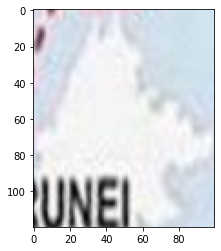

anh co chua ban do


In [61]:
PrintResult("/home/giang/Pictures/anhtest1000.jpg")